In [225]:
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Import train & test data 
train = pd.read_csv('./Data/train.csv')
test = pd.read_csv('./Data/test.csv')

In [226]:
train.head()

,id,sex and age,high_BP,heart_condition_detected_2017,married,job_status and living_area,average_blood_sugar,BMI,smoker_status,TreatmentA,TreatmentB,TreatmentC,TreatmentD,stroke_in_2018
0,16053,"F, 61",1,0,1,government?Remote,71.67,36.6,non-smoker,NaN,NaN,NaN,NaN,0
1,1459,"F, 30",0,0,0,Remote?private_sector,107.95,30.4,quit,NaN,NaN,NaN,NaN,0
2,7678,"F, 51",1,0,1,government?Remote,76.49,42.1,active_smoker,NaN,NaN,NaN,NaN,0
3,34943,"F, 54",0,0,1,government?City,113.98,57.3,quit,NaN,NaN,NaN,NaN,0
4,17741,"M, 27",0,0,0,private_sector?City,70.60,26.7,active_smoker,NaN,NaN,NaN,NaN,0


In [227]:
from word2number import w2n
def getGender(x):
    return 1 if x.lower() == 'm' else (0 if x.lower() == 'f' else (2 if x.lower() == 'other' else ''))

def splitAgeGender(x, ret_age=True):
    if not x or str(x) == 'nan':
        return ''
    
    parts = str(x).replace(',', ' ').split()
    age = gender = ''
    if ret_age:
        try:
            age = w2n.word_to_num(parts[0])
        except ValueError:
            try:
                age = float(parts[0])
            except ValueError:
                pass
        if not age and len(parts) > 1:
            try:
                age = w2n.word_to_num(parts[1])
            except ValueError:
                try:
                    age = float(parts[1])
                except ValueError:
                    pass
        return age
    else:
        gender = getGender(parts[0])
        if gender == '' and len(parts) > 1:
            gender = getGender(parts[1])
        return gender
            
old_df = train
new_df = pd.DataFrame(old_df)
new_df['sex'] = old_df['sex and age'].apply(lambda x: splitAgeGender(x, False))
new_df['age'] = old_df['sex and age'].apply(lambda x: splitAgeGender(x, True))
new_df = new_df[['id', 'sex', 'age', 'sex and age', 'high_BP', 'heart_condition_detected_2017', 'married', 'job_status and living_area', 'average_blood_sugar', 'BMI', 'smoker_status', 'TreatmentA', 'TreatmentB', 'TreatmentC', 'TreatmentD', 'stroke_in_2018']]
new_df.head()

,id,sex,age,sex and age,high_BP,heart_condition_detected_2017,married,job_status and living_area,average_blood_sugar,BMI,smoker_status,TreatmentA,TreatmentB,TreatmentC,TreatmentD,stroke_in_2018
0,16053,0,61,"F, 61",1,0,1,government?Remote,71.67,36.6,non-smoker,NaN,NaN,NaN,NaN,0
1,1459,0,30,"F, 30",0,0,0,Remote?private_sector,107.95,30.4,quit,NaN,NaN,NaN,NaN,0
2,7678,0,51,"F, 51",1,0,1,government?Remote,76.49,42.1,active_smoker,NaN,NaN,NaN,NaN,0
3,34943,0,54,"F, 54",0,0,1,government?City,113.98,57.3,quit,NaN,NaN,NaN,NaN,0
4,17741,1,27,"M, 27",0,0,0,private_sector?City,70.60,26.7,active_smoker,NaN,NaN,NaN,NaN,0


In [228]:
print(new_df['age'].unique())
print(new_df['sex'].unique())
print(new_df['smoker_status'].unique())

[61 30 51 54 27 '' 63 55 37 49 28 68 6 48 36 53 72 64 71 34 76 16 31 66 74
 59 52 43 15 32 17 79 5 39 83 8 82 11 38 25 40 80 77 60 42 35 19 70 85 73
 57 67 50 33 69 78 22 13 62 65 58 44 18 3.24 20 46 26 12 3.64 29 56 3.72
 4.16 4.56 23 21 24 41 10 47 81 4.08 45 3.8 9 7 84 75 3.4 4.4 3.56 14 3.32
 3.08 4.48 4.72 4.24 4.64 3.88 4.88 4.8 4.32 4 3.16 3.48]
[0 1 '' 2]
['non-smoker' 'quit' 'active_smoker' nan '__' '11' ',,' '.' '_' '���' ','
 '>??' '?' '>' 'quit?' 'non>' 'N?A' '..' '??']


In [229]:
new_df.to_csv('./Data/train_as.csv')

In [230]:
def getSmokeStatus(x):
    x = str(x).lower()
    x = ''.join([i for i in x if i.isalpha()])
    return 1 if 'non' in x else (2 if 'quit' in x else (3 if 'active' in x else 0))

new_df['smoker_status_2'] = old_df['smoker_status'].apply(getSmokeStatus)
new_df = new_df[['id', 'sex', 'age', 'sex and age', 'high_BP', 'heart_condition_detected_2017', 'married', 'job_status and living_area', 'average_blood_sugar', 'BMI', 'smoker_status', 'smoker_status_2', 'TreatmentA', 'TreatmentB', 'TreatmentC', 'TreatmentD', 'stroke_in_2018']]
new_df.head()

,id,sex,age,sex and age,high_BP,heart_condition_detected_2017,married,job_status and living_area,average_blood_sugar,BMI,smoker_status,smoker_status_2,TreatmentA,TreatmentB,TreatmentC,TreatmentD,stroke_in_2018
0,16053,0,61,"F, 61",1,0,1,government?Remote,71.67,36.6,non-smoker,1,NaN,NaN,NaN,NaN,0
1,1459,0,30,"F, 30",0,0,0,Remote?private_sector,107.95,30.4,quit,2,NaN,NaN,NaN,NaN,0
2,7678,0,51,"F, 51",1,0,1,government?Remote,76.49,42.1,active_smoker,3,NaN,NaN,NaN,NaN,0
3,34943,0,54,"F, 54",0,0,1,government?City,113.98,57.3,quit,2,NaN,NaN,NaN,NaN,0
4,17741,1,27,"M, 27",0,0,0,private_sector?City,70.60,26.7,active_smoker,3,NaN,NaN,NaN,NaN,0


In [231]:
print(new_df['smoker_status_2'].unique())

[1 2 3 0]


In [232]:
new_df.to_csv('./Data/train_as_ss.csv')

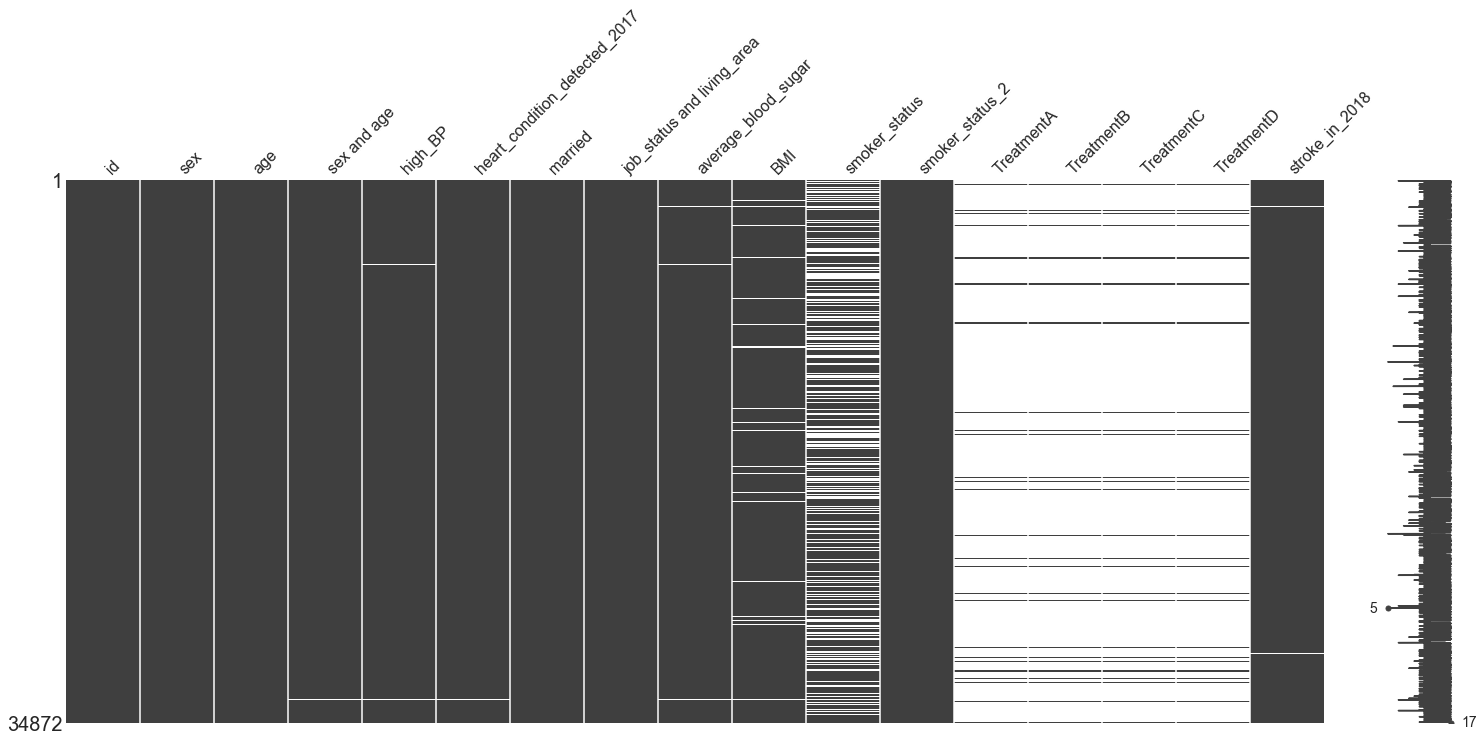

In [233]:
missingno.matrix(new_df)

In [234]:
all_is_null = zip(new_df.isnull(), new_df.isnull().sum())
for is_null in all_is_null:
    if is_null[1] > 0:
        print(f'{is_null[0]}: {is_null[1]}')
print()
print(f'Total: {len(train)}')

sex and age: 37
high_BP: 47
heart_condition_detected_2017: 50
married: 15
job_status and living_area: 31
average_blood_sugar: 61
BMI: 1204
smoker_status: 10640
TreatmentA: 33217
TreatmentB: 33217
TreatmentC: 33217
TreatmentD: 33217
stroke_in_2018: 34

Total: 34872


In [235]:
def fixBmi(x):
    x = str(x)
    if x == 'nan' or x == '?':
        x = 0
        
    return float(x)

new_df['BMI'] = old_df['BMI'].apply(fixBmi)

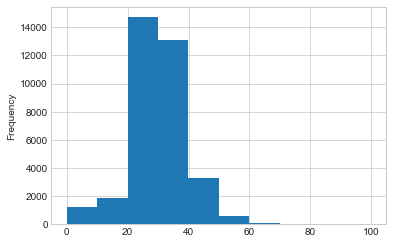

In [236]:
new_df.BMI.plot.hist()

In [237]:
def discreteBmi(x):
    if x < 0.5:
        return ''
    elif x < 18.5:
        return 1
    elif x < 25:
        return 2
    elif x < 30:
        return 3
    elif x < 35:
        return 4
    elif x < 40:
        return 5
    return 6

new_df['BMI_2'] = new_df['BMI'].apply(discreteBmi)
new_df = new_df[['id', 'sex', 'age', 'sex and age', 'high_BP', 'heart_condition_detected_2017', 'married', 'job_status and living_area', 'average_blood_sugar', 'BMI', 'BMI_2', 'smoker_status', 'smoker_status_2', 'TreatmentA', 'TreatmentB', 'TreatmentC', 'TreatmentD', 'stroke_in_2018']]
new_df.head()

,id,sex,age,sex and age,high_BP,heart_condition_detected_2017,married,job_status and living_area,average_blood_sugar,BMI,BMI_2,smoker_status,smoker_status_2,TreatmentA,TreatmentB,TreatmentC,TreatmentD,stroke_in_2018
0,16053,0,61,"F, 61",1,0,1,government?Remote,71.67,36.6,5,non-smoker,1,NaN,NaN,NaN,NaN,0
1,1459,0,30,"F, 30",0,0,0,Remote?private_sector,107.95,30.4,4,quit,2,NaN,NaN,NaN,NaN,0
2,7678,0,51,"F, 51",1,0,1,government?Remote,76.49,42.1,6,active_smoker,3,NaN,NaN,NaN,NaN,0
3,34943,0,54,"F, 54",0,0,1,government?City,113.98,57.3,6,quit,2,NaN,NaN,NaN,NaN,0
4,17741,1,27,"M, 27",0,0,0,private_sector?City,70.60,26.7,3,active_smoker,3,NaN,NaN,NaN,NaN,0


In [238]:
new_df_2 = new_df[new_df['stroke_in_2018'].isin(['1', '0'])]
print(new_df_2['stroke_in_2018'].unique())

['0' '1']


In [239]:
def discreteBloodSugar(x):
    if x < 70:
        return 1
    elif x < 120:
        return 2
    elif x < 200:
        return 3
    elif x < 280:
        return 3
    return 4

new_df_2['average_blood_sugar_2'] = new_df_2['average_blood_sugar'].apply(discreteBloodSugar)
new_df_2 = new_df_2[['id', 'sex', 'age', 'sex and age', 'high_BP', 'heart_condition_detected_2017', 'married', 'job_status and living_area', 'average_blood_sugar', 'average_blood_sugar_2', 'BMI', 'BMI_2', 'smoker_status', 'smoker_status_2', 'TreatmentA', 'TreatmentB', 'TreatmentC', 'TreatmentD', 'stroke_in_2018']]
new_df_2.head()

,id,sex,age,sex and age,high_BP,heart_condition_detected_2017,married,job_status and living_area,average_blood_sugar,average_blood_sugar_2,BMI,BMI_2,smoker_status,smoker_status_2,TreatmentA,TreatmentB,TreatmentC,TreatmentD,stroke_in_2018
0,16053,0,61,"F, 61",1,0,1,government?Remote,71.67,2,36.6,5,non-smoker,1,NaN,NaN,NaN,NaN,0
1,1459,0,30,"F, 30",0,0,0,Remote?private_sector,107.95,2,30.4,4,quit,2,NaN,NaN,NaN,NaN,0
2,7678,0,51,"F, 51",1,0,1,government?Remote,76.49,2,42.1,6,active_smoker,3,NaN,NaN,NaN,NaN,0
3,34943,0,54,"F, 54",0,0,1,government?City,113.98,2,57.3,6,quit,2,NaN,NaN,NaN,NaN,0
4,17741,1,27,"M, 27",0,0,0,private_sector?City,70.60,2,26.7,3,active_smoker,3,NaN,NaN,NaN,NaN,0


0    34179
1      652
Name: stroke_in_2018, dtype: int64


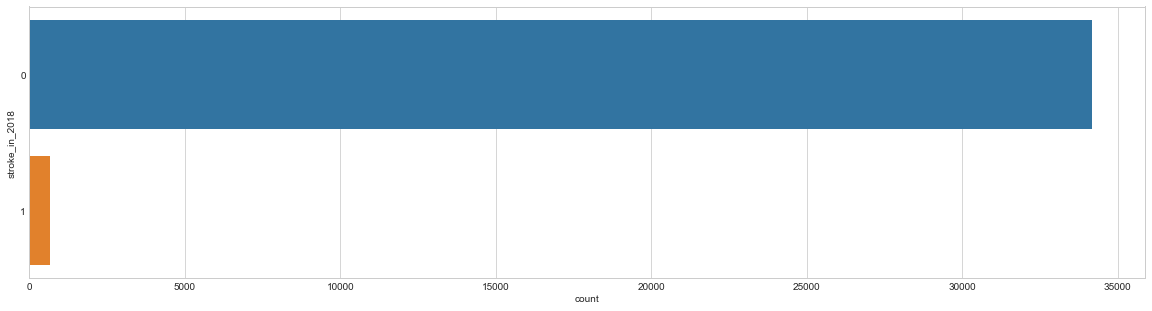

In [240]:
fig = plt.figure(figsize=(20,5))
sns.countplot(y='stroke_in_2018', data=new_df_2);
print(new_df_2.stroke_in_2018.value_counts())

In [247]:
def cleanBinary(x, flip=False):
    val = x
    try:
        val = int(x)
        if flip:
            val = 1 if val == 1 else 0
        else:
            val = 0 if val == 0 else 1
    except ValueError:
        val = ''
    return val

def checkTreated(x):
    return 0 if str(x) == 'nan' else 1

new_df_2['high_BP_2'] = new_df_2['high_BP'].apply(cleanBinary)
new_df_2['heart_condition_detected_2017_2'] = new_df_2['heart_condition_detected_2017'].apply(cleanBinary)
new_df_2['married_2'] = new_df_2['married'].apply(cleanBinary)
new_df_2['TreatmentD_2'] = new_df_2['TreatmentD'].apply(cleanBinary)
new_df_2['treated'] = new_df_2['TreatmentA'].apply(checkTreated)
new_df_3 = new_df_2[['id', 'sex', 'age', 'sex and age', 'high_BP_2', 'heart_condition_detected_2017_2', 'married_2', 'job_status and living_area', 'average_blood_sugar', 'average_blood_sugar_2', 'BMI', 'BMI_2', 'smoker_status', 'smoker_status_2', 'TreatmentA', 'TreatmentB', 'TreatmentC', 'TreatmentD_2', 'treated', 'stroke_in_2018']]
print(new_df_3['treated'].unique())

[0 1]


In [248]:
new_df_3.to_csv('./Data/train_2.csv')


Total: 33555


"for label in ['sex', 'age', 'high_BP_2', 'heart_condition_detected_2017_2', 'married_2', 'average_blood_sugar_2', 'BMI_2', 'smoker_status_2','treated]:\n    print(label)\n    print(train[label].unique())\n    print()"

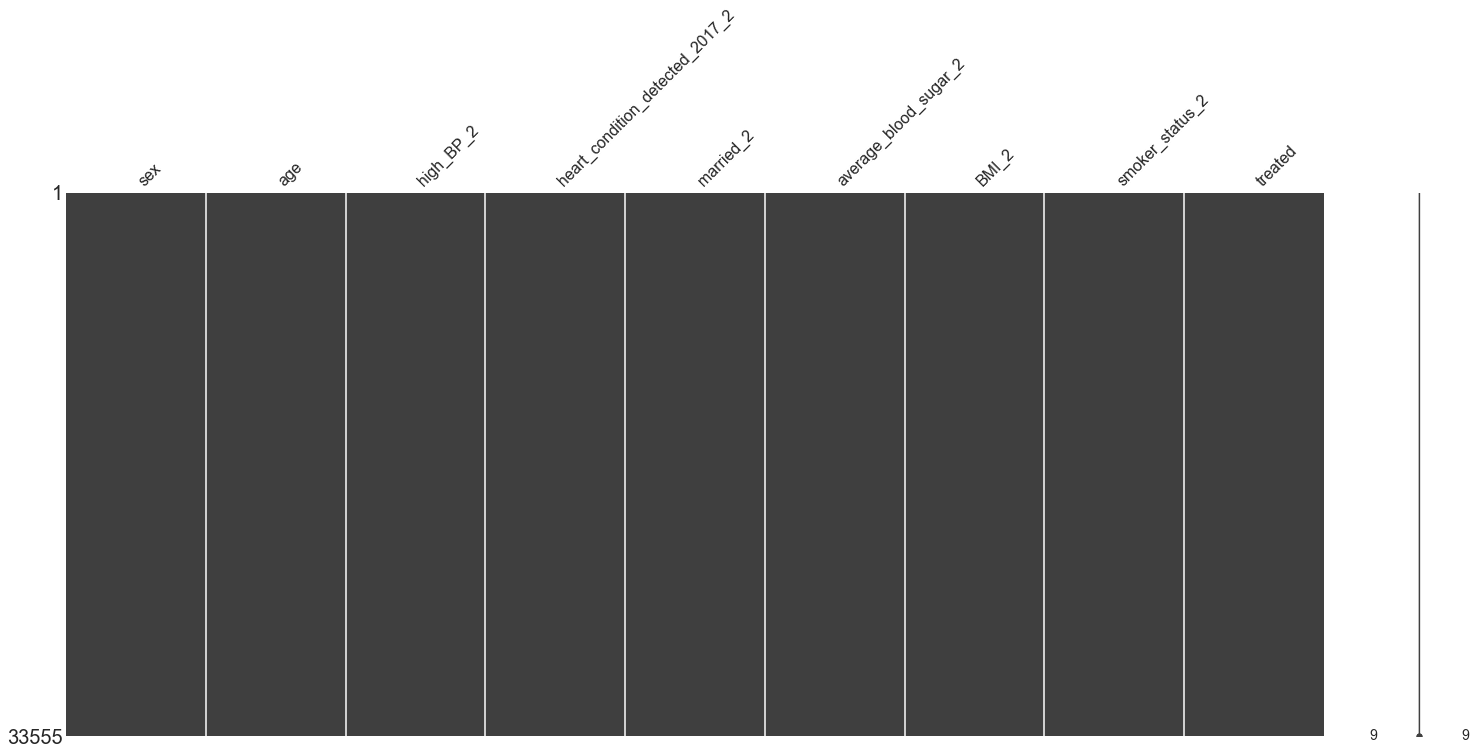

In [249]:
from ModelsTest import runTests

train = pd.read_csv('./Data/train_2.csv')
train_2 = train.dropna(subset=['sex', 'age', 'high_BP_2', 'heart_condition_detected_2017_2', 'married_2', 'average_blood_sugar_2', 'BMI_2', 'smoker_status_2'])

x_train = train_2[['sex', 'age', 'high_BP_2', 'heart_condition_detected_2017_2', 'married_2', 'average_blood_sugar_2', 'BMI_2', 'smoker_status_2', 'treated']].copy()
y_train = train_2[['stroke_in_2018']].copy()

missingno.matrix(x_train)

all_is_null = zip(x_train.isnull(), x_train.isnull().sum())
for is_null in all_is_null:
    if is_null[1] > 0:
        print(f'{is_null[0]}: {is_null[1]}')
print()
print(f'Total: {len(x_train)}')

'''for label in ['sex', 'age', 'high_BP_2', 'heart_condition_detected_2017_2', 'married_2', 'average_blood_sugar_2', 'BMI_2', 'smoker_status_2','treated]:
    print(label)
    print(train[label].unique())
    print()'''


In [251]:
runTests(x_train, y_train, test_type='cv', data_used=1)

      Model        |       Time       | Accuracy (train) | Accuracy (test) 
----------------------------------------------------------------------------
  Decision Tree    |      4.331       |      98.97       |      97.56      
   Gaussian NB     |      0.268       |      93.39       |       93.4      
  Multinomial NB   |      0.214       |      98.25       |      98.24      
  LogRegression    |      1.078       |       98.4       |       98.4      
Nearest Neighbors  |       2.82       |       98.4       |      98.38      
